# Attention Mechanism

In [77]:
import torch
from torch import nn
from d2l import torch as d2l

#### Heat map

In [72]:
# visualize attention weights
# heatmap implementation 

def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap="Reds"):
	d2l.use_svg_display()
	num_rows, num_cols = matrices.shape[0], matrices.shape[1]
	fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False) # shape0, shape1 -- number of subplots

	for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)): # row_axes seperate out first dimension -- (1, 1, 10, 10) to (1, 10, 10)
		for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)): # ax seperate out second dimension -- (1, 10, 10) to (10, 10)
			pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
			if i == num_rows - 1:
				ax.set_xlabel(xlabel) # we may have (row, col) subplots -- we set xlabel at once at the bottom
			if j == 0:
				ax.set_ylabel(ylabel)
			if titles:
				ax.set_title(titles[j]) # a list a subtitles
	fig.colorbar(pcm, ax=axes, shrink=0.6)

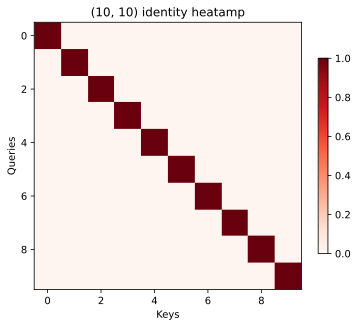

In [76]:
# test 
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel="Keys", ylabel="Queries", titles=["(10, 10) identity heatamp"], figsize=(6, 6))

#### Generate simple noisy dataset

Here I generate a non-linear dataset with noise. <br>
$$y_{i} = 2sin(x_{i}) + x_i^{0.8} + \epsilon$$

number of training samples: 50, number of test samples: 50


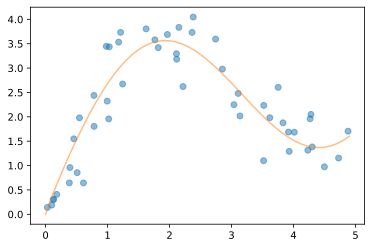

In [89]:
n_train = 50  # number of training data 
x_train, index_original = torch.sort(torch.rand(n_train) * 5) # x_training after sorted -- increasing order 

def f(x):
	return 2 * torch.sin(x) + x**0.8

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train, )) # mean, std, shape
x_test = torch.arange(0, 5, 0.1)
y_test = f(x_test)

n_test = len(x_test)
print("number of training samples: {}, number of test samples: {}".format(n_train, n_test))

# plot the train and test
d2l.plt.plot(x_train, y_train, 'o', alpha=0.5)
d2l.plt.plot(x_test, y_test, alpha=0.5)
d2l.plt.show()

#### Average pooling

$$f(x) = \frac{1}{n} \sum^n_{i=1} y_i$$

some changes

In [ ]:
#